In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [14]:
df = pd.read_csv('SalesTransaction.csv')
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [11]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [9]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [20]:
X = df[['Price' , 'Quantity']]

In [21]:
X

,Price,Quantity
0,21.47,12
1,10.65,36
2,11.53,12
3,10.65,12
4,11.94,6
...,...,...
536345,18.96,-2
536346,14.09,-3
536347,11.74,-1
536348,16.35,-4


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 


In [74]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters=5, random_state=42)
X=df[['Price' ,'Quantity']]
KMeans.fit(X)
df['Clusters'] =KMeans.labels_
print(df.head())


  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  Clusters  
0  21.47        12     17490.0  United Kingdom         0  
1  10.65        36     13069.0  United Kingdom         0  
2  11.53        12     13069.0  United Kingdom         0  
3  10.65        12     13069.0  United Kingdom         0  
4  11.94         6     13069.0  United Kingdom         0  


In [93]:
KMeans

KMeans(n_clusters=5, random_state=42)

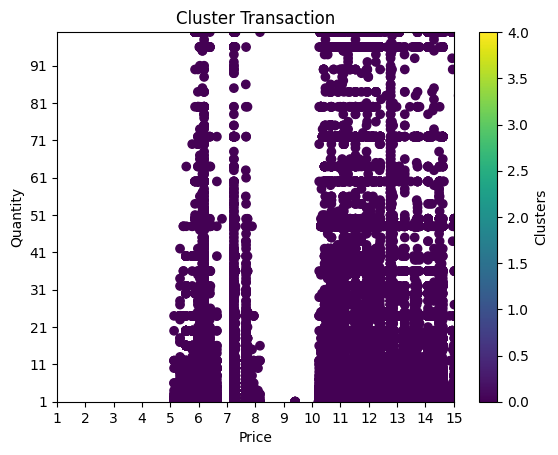

In [83]:
import matplotlib.pyplot as plt
plt.scatter(df['Price'],df['Quantity'],c=df['Clusters'],cmap = 'viridis')
plt.title('Cluster Transaction')
plt.colorbar(label = 'Clusters')
plt.xlabel('Price')
plt.xlim(1,15)
plt.xticks(range(1,16,1))
plt.ylim(1,100)
plt.yticks(range(1,101,10))
plt.ylabel('Quantity')
plt.axis('on')
plt.grid(False)
plt.show()

In [92]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05,random_state=42)
df['Anomaly'] = model.fit_predict(X_scaled)
anomalies =df[df['Anomaly'] == -1]
print("Anomalous Transactions:")
print(anomalies)

Anomalous Transactions:
       TransactionNo       Date ProductNo                         ProductName  \
0             581482  12/9/2019     22485       Set Of 2 Wooden Market Crates   
24            581476  12/9/2019     23167       Small Ceramic Top Storage Jar   
30            581476  12/9/2019     22998        Travel Card Wallet Keep Calm   
38            581476  12/9/2019     22693  Grow A Flytrap Or Sunflower In Tin   
45            581476  12/9/2019     22197                      Popcorn Holder   
...              ...        ...       ...                                 ...   
536212        536592  12/1/2018     22795        Sweetheart Recipe Book Stand   
536229        536544  12/1/2018     22423            Regency Cakestand 3 Tier   
536238        536592  12/1/2018     22423            Regency Cakestand 3 Tier   
536274        536374  12/1/2018     21258          Victorian Sewing Box Large   
536276        536477  12/1/2018     22423            Regency Cakestand 3 Tier   

   

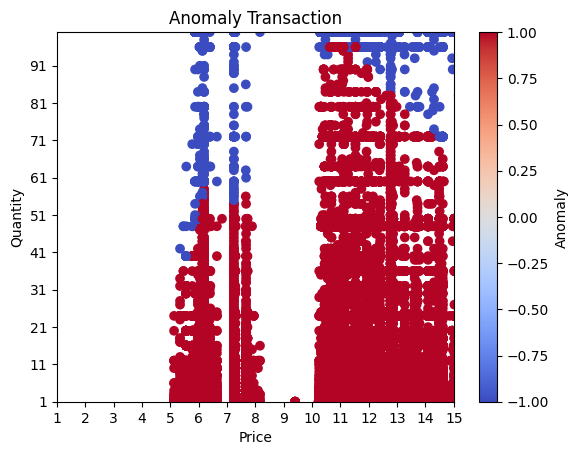

In [90]:
plt.scatter(df['Price'],df['Quantity'],c=df['Anomaly'],cmap='coolwarm')
plt.title('Anomaly Transaction')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.xlim(1,15)
plt.xticks(range(1,16,1))
plt.ylim(1,100)
plt.yticks(range(1,101,10))
plt.colorbar(label='Anomaly')
plt.grid(False)
plt.show()